<a href="https://colab.research.google.com/github/aksanaboo/persona_predict/blob/master/MBTIType500EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Exploratory Data Analysis

MBTI (Myers-Briggs Type Indicator) is an introspective self-report questionnaire indicating differing psychological preferences (cognitive functions) in how people perceive the world and make decisions.

Personality types are 16 unique values.

In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI 500.csv')

In [7]:
#about the dataset

#Posts are preprocessed texts:

#No punctuations, stopwords, URLs
#Lemmatization
#Reconstruct samples to be equal-sized chunks (500 words per sample)

In [5]:
mbti.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [6]:
mbti.shape

(106067, 2)

In [8]:
mbti.type.value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [9]:
# no missing data
mbti.isnull().sum()

posts    0
type     0
dtype: int64

In [10]:
# no duplicates
mbti.duplicated().sum()

0

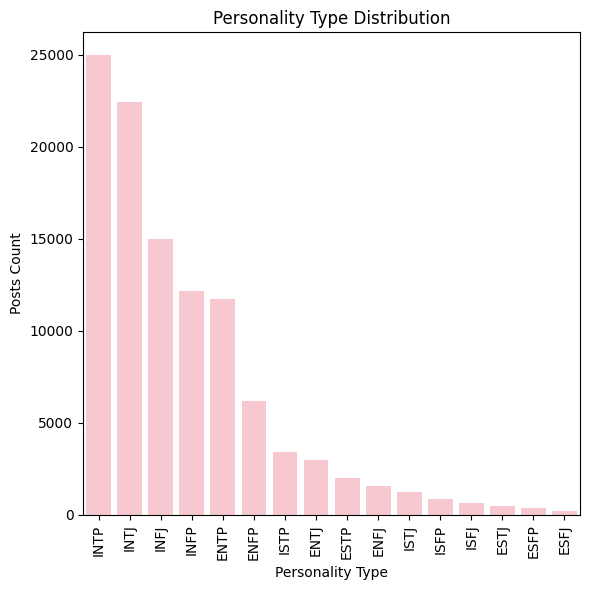

In [21]:
type_counts = mbti['type'].value_counts()
sorted_types = type_counts.index.tolist()
sorted_types.sort(key=lambda x: type_counts[x], reverse=True)

plt.figure(figsize=(6, 6))  # Adjust the figure size if needed

sns.countplot(data=mbti, x='type', order=sorted_types, color='pink')
plt.xlabel('Personality Type')
plt.ylabel('Posts Count')
plt.title('Personality Type Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [25]:
#Dataset Imbalanced
#Top 3 personality Type by posts count = INTP INTJ INFJ
#Last 3 personality Type by posts count = ESTJ ESFP ESFJ
#Reason?

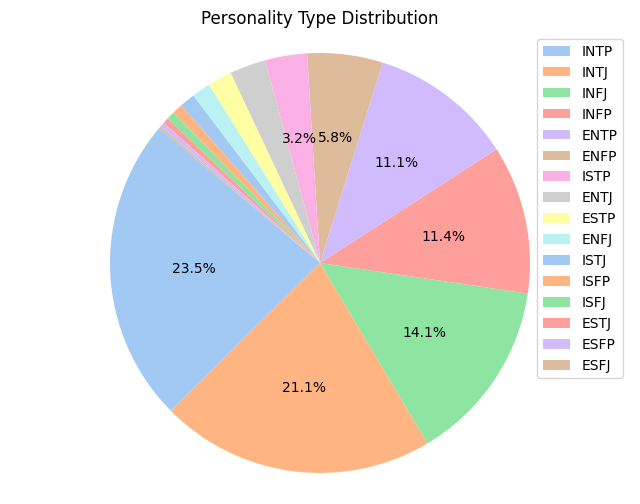

In [31]:
plt.figure(figsize=(8, 6))

type_counts = mbti['type'].value_counts()
labels = type_counts.index.tolist()
sizes = type_counts.values

def custom_autopct(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''

patches, texts, autotexts = plt.pie(sizes, labels=None, autopct=custom_autopct, startangle=140, colors=sns.color_palette("pastel"))
plt.axis('equal')


plt.legend(patches, labels, loc="best")

plt.title('Personality Type Distribution')
plt.show()

In [32]:
#MBTI is based on 4 dimensions

**Personality Types Key**

> Extroverts and  Introverts

> Sensors and Intuitives

> Thinkers and Feelers

> Judgers and Perceivers










In [33]:
mbti['IE'] = mbti['type'].str[0]
mbti['NS'] = mbti['type'].str[1]
mbti['TF'] = mbti['type'].str[2]
mbti['JP'] = mbti['type'].str[3]

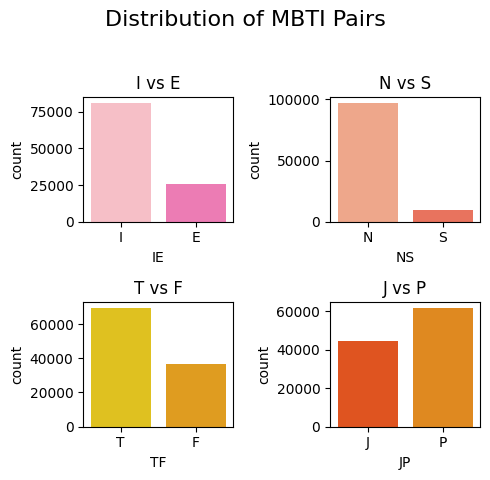

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
fig.suptitle('Distribution of MBTI Pairs', fontsize=16)


color_palette_ie = ["#FFB6C1", "#FF69B4"]  # Light and medium pink shades for 'IE'
color_palette_ns = ["#FFA07A", "#FF6347"]  # Light and medium coral shades for 'NS'
color_palette_tf = ["#FFD700", "#FFA500"]  # Light and medium gold shades for 'TF'
color_palette_jp = ["#FF4500", "#FF8C00"]  # Dark orange and dark orange shades for 'JP'

sns.countplot(ax=axes[0, 0], data=mbti, x='IE', palette=color_palette_ie)
axes[0, 0].set_title('I vs E')

sns.countplot(ax=axes[0, 1], data=mbti, x='NS', palette=color_palette_ns)
axes[0, 1].set_title('N vs S')

sns.countplot(ax=axes[1, 0], data=mbti, x='TF', palette=color_palette_tf)
axes[1, 0].set_title('T vs F')

sns.countplot(ax=axes[1, 1], data=mbti, x='JP', palette=color_palette_jp)
axes[1, 1].set_title('J vs P')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [40]:
##Most Frequent words used by each Personalities

In [41]:
tfidf_features= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

In [43]:
tfidf_features.head()

,personality_type,ability,able,absolute,absolutely,abstract,abuse,accept,access,accomplish,...,yeah,year,yep,yes,yesterday,young,youtube,yup,zero,zone
0,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.023638,0.0,0.000000,0.0,0.0,0.00000,0.065758,0.0,0.000000
1,INTJ,0.0,0.071614,0.0,0.0,0.0,0.0,0.093034,0.000000,0.0,...,0.031473,0.052679,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
2,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.040887,0.000000,0.0,...,0.000000,0.023152,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.061519
3,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.040967,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
4,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.253479,0.0,...,0.000000,0.044442,0.0,0.025774,0.0,0.0,0.05857,0.000000,0.0,0.000000


In [46]:
tfidf_features.shape

(106067, 1501)

In [59]:
import pandas as pd

# Assuming 'tfidf_features' is your TF-IDF dataframe with 'personality_type' as a column and 1500 word columns

# Group data by personality type
mbti_grouped = tfidf_features.groupby('personality_type')

# Create an empty dictionary to store the top words, next words, and another set of words for each personality type
words_by_type = {}

# Iterate over each personality type group
for personality_type, group in mbti_grouped:
    # Calculate summed TF-IDF scores for each word
    sum_tfidf = group.drop(columns=['personality_type']).sum()  # Exclude the 'personality_type' column

    # Sort words based on summed TF-IDF scores
    top_words = sum_tfidf.sort_values(ascending=False).index.tolist()

    # Store words in the dictionary
    top_and_next_words = top_words[:10]  # Change 10 to the number of top words you want to retrieve
    next_words = top_words[10:20]  # Retrieve the next 10 words
    another_words = top_words[20:30]  # Retrieve another set of 10 words

    words_by_type[personality_type] = {
        'top_words': top_and_next_words,
        'next_words': next_words,
        'another_words': another_words
    }

# Print the words for each personality type
for personality_type, words in words_by_type.items():
    print(f"Personality Type {personality_type}:\nTop Words: {', '.join(words['top_words'])}\nNext Words: {', '.join(words['next_words'])}\nAnother Words: {', '.join(words['another_words'])}\n")




Personality Type ENFJ:
Top Words: like, think, people, feel, know, make, thing, really, say, type
Next Words: good, enfjs, love, time, want, fe, friend, way, function, try
Another Words: need, lot, lol, help, work, ni, thank, person, talk, relationship

Personality Type ENFP:
Top Words: like, think, people, feel, thing, make, know, time, really, love
Next Words: good, friend, want, say, enfps, way, work, try, type, life
Another Words: lot, need, talk, help, come, person, relationship, tell, day, thank

Personality Type ENTJ:
Top Words: like, people, think, make, good, know, entjs, thing, time, say
Next Words: type, want, feel, work, really, way, need, trade, card, try
Another Words: friend, use, function, lot, look, te, life, mean, come, love

Personality Type ENTP:
Top Words: like, think, people, make, thing, say, know, good, really, time
Next Words: feel, want, type, way, work, entps, use, try, ne, function
Another Words: mean, lot, fuck, need, friend, shit, fe, talk, look, idea

Per

In [61]:
mbti_personality = tfidf_features.groupby('personality_type').sum()

In [62]:
mbti_personality

,ability,able,absolute,absolutely,abstract,abuse,accept,access,accomplish,accord,...,yeah,year,yep,yes,yesterday,young,youtube,yup,zero,zone
personality_type,,,,,,,,,,,,,,,,,,,,,
ENFJ,16.336760,28.114995,5.073518,14.639935,6.174371,5.885491,16.148102,4.749984,5.583006,8.020291,...,30.020779,28.367420,5.212607,37.994770,4.735015,14.814532,4.762245,6.822422,3.026340,4.272781
ENFP,52.792965,107.254016,20.996382,65.357157,21.060448,22.375099,71.782948,10.649512,25.775920,22.427134,...,142.906308,196.743830,35.319671,163.043358,27.316475,74.809633,26.106190,30.333952,15.834956,25.502336
ENTJ,30.715526,52.482899,11.130311,25.321368,12.933589,13.440022,35.107868,15.252184,19.485477,12.299976,...,45.545073,72.278204,15.841720,65.769178,8.702940,32.671759,9.077432,8.288923,12.309884,10.752380
ENTP,121.440358,188.215125,44.964396,110.575635,81.019426,38.869036,114.115842,35.475441,48.767166,56.532531,...,347.899069,309.957500,63.342933,235.393549,32.522760,127.999257,47.059732,40.401037,44.849298,36.640570
ESFJ,1.747691,2.543834,0.315819,1.365094,0.950277,0.538653,1.226446,0.152820,0.708163,1.144031,...,4.304825,4.948764,0.726109,4.088876,0.465644,1.886735,1.293335,0.283132,0.600502,0.240242
ESFP,2.350300,4.691453,0.655323,2.889166,3.589640,1.819463,3.107254,0.366699,1.301582,2.186430,...,18.737168,7.405242,3.012955,8.113785,1.557930,2.555389,0.904004,0.914951,0.816742,1.340597
ESTJ,4.086983,5.692144,1.770920,3.960581,6.220068,0.910376,4.225498,0.895093,2.040993,2.479863,...,10.238742,9.477074,1.467373,6.368366,1.208647,3.573902,1.465000,1.009005,0.756266,0.555444
ESTP,15.355733,25.025232,6.264452,17.110052,6.557816,6.629700,15.538823,13.774150,2.465576,15.985502,...,48.566817,65.145545,8.505557,42.181608,7.689927,16.518140,10.948134,7.202943,7.196847,11.225682
INFJ,126.442595,289.195129,50.338633,160.158327,68.415070,87.187831,204.433586,42.394749,48.475141,55.406367,...,298.696492,475.991220,79.089656,363.993160,53.137599,191.503618,54.986118,57.587035,49.994016,65.381769


In [63]:
mbti_personality = mbti_personality.transpose()

<ipython-input-66-8c0780c6c95c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  istp_personality.sort_values('ISTP', ascending=False, inplace=True)


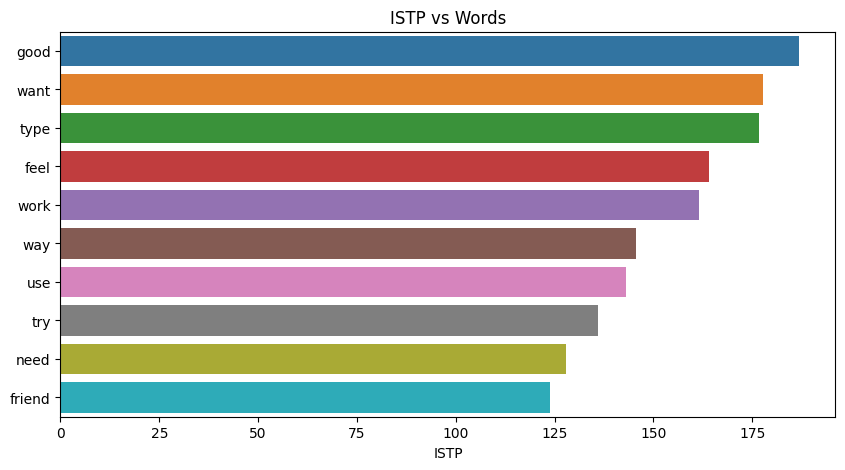

In [66]:
istp_personality = mbti_personality[['ISTP']]
istp_personality.sort_values('ISTP', ascending=False, inplace=True)
istp_personality_subset = istp_personality.iloc[10:20]  # Select rows 10 to 19

plt.figure(figsize=(10, 5))
sns.barplot(x=istp_personality_subset.ISTP, y=istp_personality_subset.index)
plt.title('ISTP vs Words')
plt.show()



<ipython-input-68-c6862f18b33a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estp_personality.sort_values('ESTP', ascending=False, inplace=True)


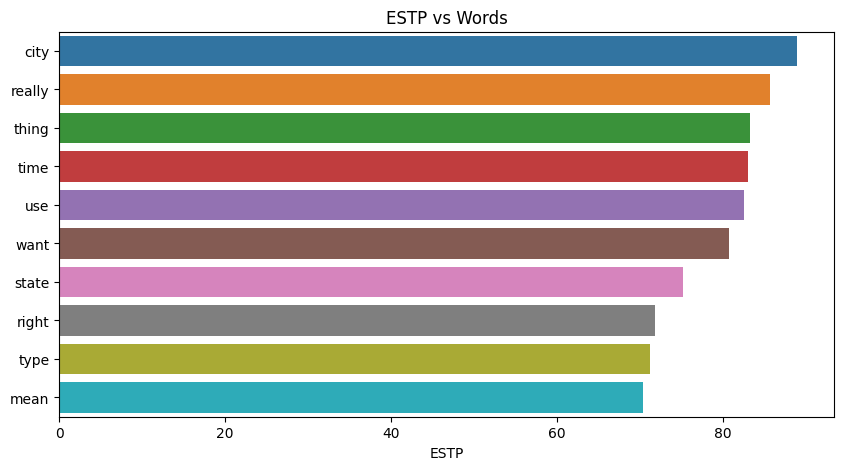

In [68]:
estp_personality = mbti_personality[['ESTP']]
estp_personality.sort_values('ESTP', ascending=False, inplace=True)
estp_personality_subset = estp_personality.iloc[10:20]  # Select rows 10 to 19

plt.figure(figsize=(10, 5))
sns.barplot(x=estp_personality_subset.ESTP, y=estp_personality_subset.index)
plt.title('ESTP vs Words')
plt.show()



<ipython-input-71-71d111219532>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intp_personality.sort_values('INTP', ascending=False, inplace=True)


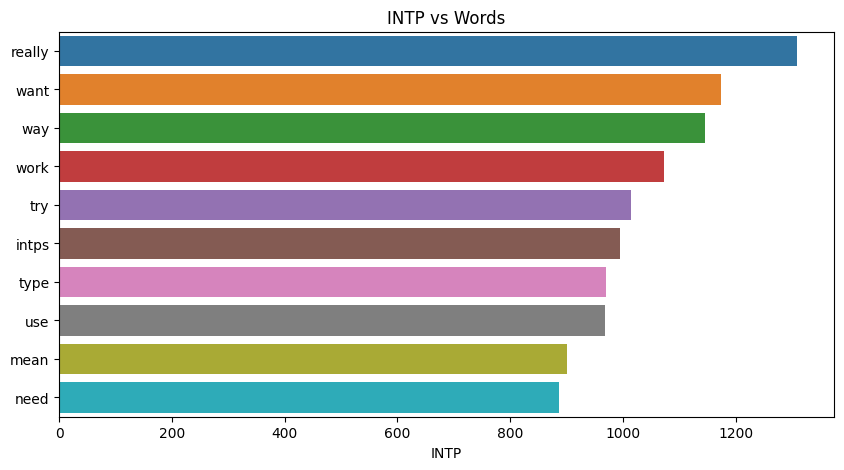

In [71]:
intp_personality = mbti_personality[['INTP']]
intp_personality.sort_values('INTP', ascending=False, inplace=True)
intp_personality_subset = intp_personality.iloc[10:20]  # Select rows 10 to 19

plt.figure(figsize=(10, 5))
sns.barplot(x=intp_personality_subset.INTP, y=intp_personality_subset.index)
plt.title('INTP vs Words')
plt.show()



<ipython-input-72-815f034095d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esfj_personality.sort_values('ESFJ', ascending=False, inplace=True)


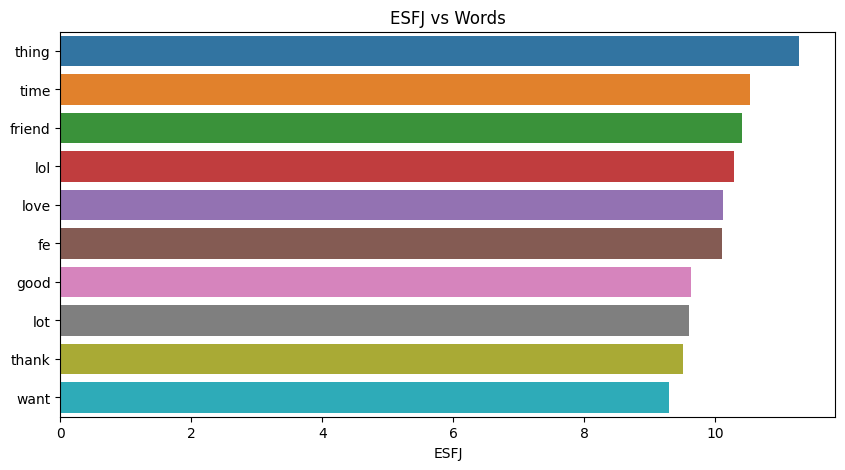

In [72]:
esfj_personality = mbti_personality[['ESFJ']]
esfj_personality.sort_values('ESFJ', ascending=False, inplace=True)
esfj_personality_subset = esfj_personality.iloc[10:20]  # Select rows 10 to 19

plt.figure(figsize=(10, 5))
sns.barplot(x=esfj_personality_subset.ESFJ, y=esfj_personality_subset.index)
plt.title('ESFJ vs Words')
plt.show()
